In [1]:
#SIT720 Machine Learning
#Assessment Task 2: Problem solving task.
#Author: William Hebblewhite
#Student ID: 220597584

In [33]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import silhouette_visualizer

In [34]:
#Import Data
Data = pd.read_csv('E:/Deakin/SIT720/Assessment-2/tripadvisor_review.csv')

In [35]:
# Data Information
print('Dataframe:\n', Data.head())
print('#########################################\n')
print('Information:\n',Data.info())
print('#########################################\n')
print('Data descriptions:\n', Data.describe())

Dataframe:
   User ID  Category 1  Category 2  Category 3  Category 4  Category 5  \
0  User 1        0.93         1.8        2.29        0.62        0.80   
1  User 2        1.02         2.2        2.66        0.64        1.42   
2  User 3        1.22         0.8        0.54        0.53        0.24   
3  User 4        0.45         1.8        0.29        0.57        0.46   
4  User 5        0.51         1.2        1.18        0.57        1.54   

   Category 6  Category 7  Category 8  Category 9  Category 10  
0        2.42        3.19        2.79        1.82         2.42  
1        3.18        3.21        2.63        1.86         2.32  
2        1.54        3.18        2.80        1.31         2.50  
3        1.52        3.18        2.96        1.57         2.86  
4        2.02        3.18        2.78        1.18         2.54  
#########################################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column

In [36]:
# Clean up Data
Data = Data.set_index('User ID')

<AxesSubplot:xlabel='User ID'>

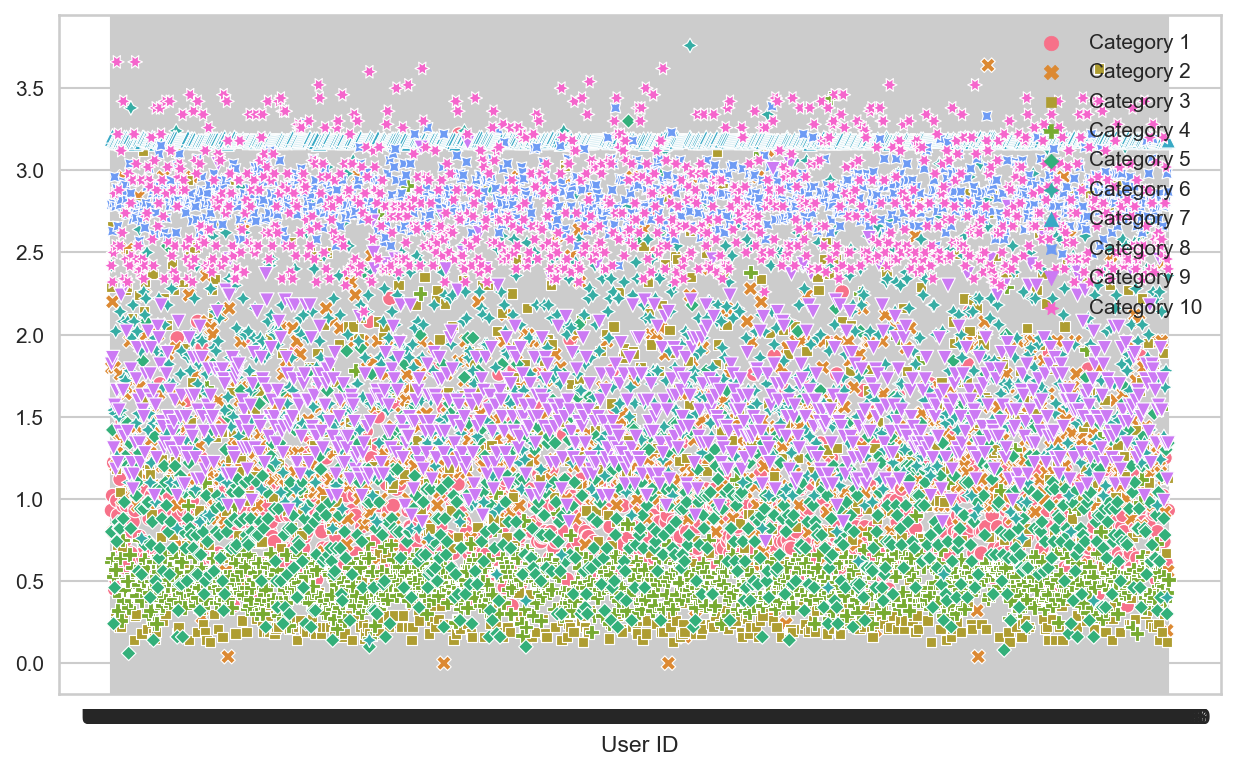

In [79]:
#Visualise the Data
plt.figure(figsize=(10,6), dpi=150)
sns.scatterplot(data=Data)

In [44]:
# Scale the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Standardise the Data
Scaled_Data = pd.DataFrame(scaler.fit_transform(Data))
Scaled_Data.head()

,0,1,2,3,4,5,6,7,8,9
0,0.112645,0.935887,1.619750,0.312960,-0.319608,1.070169,1.158657,-0.327872,0.687518,-1.180591
1,0.388088,1.772644,2.089171,0.384494,1.098486,2.479500,3.716053,-1.492056,0.797274,-1.491908
2,1.000186,-1.156005,-0.600487,-0.008942,-1.600466,-0.561689,-0.120041,-0.255111,-0.711877,-0.931537
3,-1.356389,0.935887,-0.917663,0.134126,-1.097272,-0.598777,-0.120041,0.909073,0.001540,0.189205
4,-1.172760,-0.319248,0.211486,0.134126,1.372955,0.328415,-0.120041,-0.400634,-1.068585,-0.807010


<AxesSubplot:>

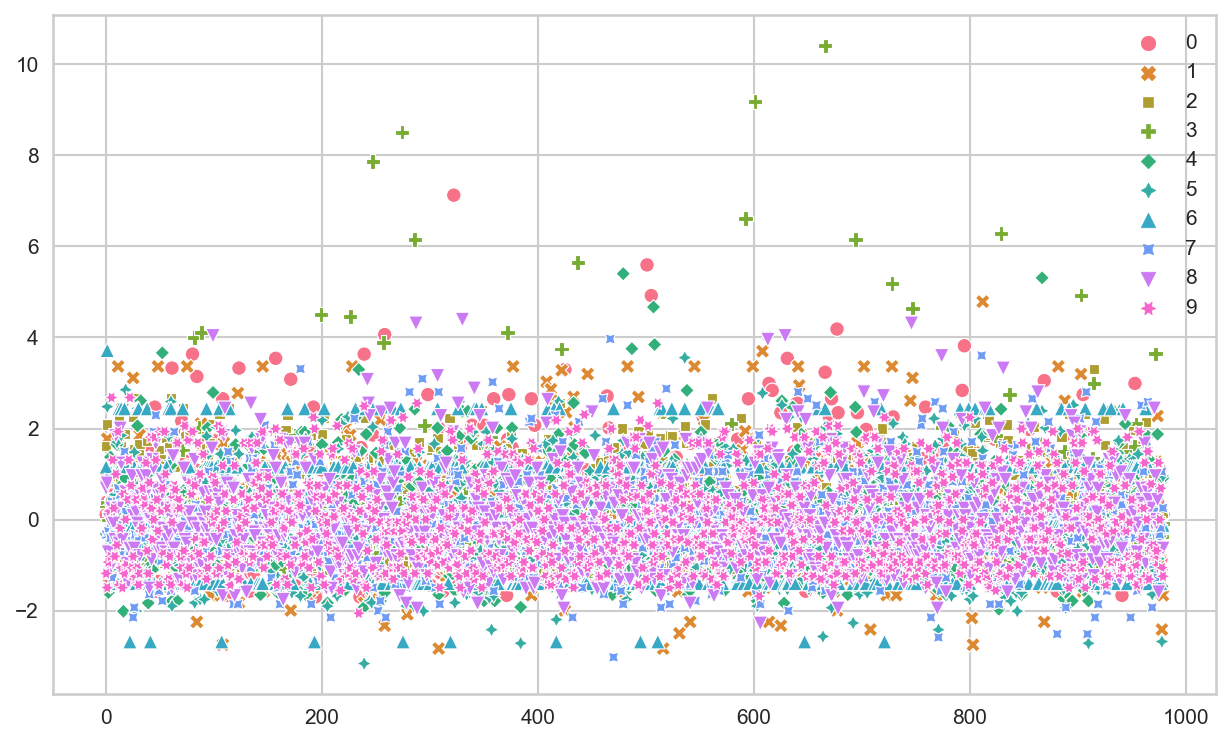

In [234]:
#Visualise Scaled Data
plt.figure(figsize=(10,6), dpi=150)
sns.scatterplot(data=Scaled_Data)

## Question 1: In this dataset (tripadvisor_review.csv), we have traveller’s average feedback/rating information on 10 different categories of attraction. We are interested in finding optimal number of traveller groups based on their attraction ratings.

### a. What method shall we use for solving this problem and why? (1 mark)
### b. Does this data suffer from curse of dimensionality? Explain. (1 mark)
### SEE PDF

### Find out optimal number of traveller groups, report the outcome and justify your findings. (2 marks)

In [58]:
import sklearn.cluster as cluster

K=range(1,10)
wss = []
for k in K:
    kmeans = cluster.KMeans(n_clusters=k, init="k-means++")
    kmeans = kmeans.fit(Scaled_Data)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

C:\Users\willh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [56]:
centroids = pd.DataFrame({'Clusters': K, 'WSS': wss})
centroids

,Clusters,WSS
0,1,9800.000000
1,2,7767.399323
2,3,7097.990818
3,4,6464.311769
4,5,5996.067824
5,6,5632.384649
6,7,5307.528808
7,8,5061.987124
8,9,4849.734035


<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

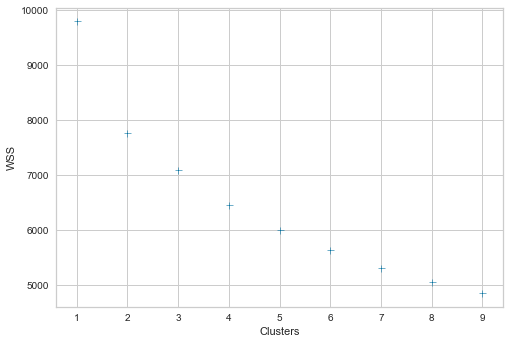

In [55]:
sns.scatterplot(x='Clusters', y='WSS', data= centroids, marker ="+")

In [129]:
points = Scaled_Data[0]

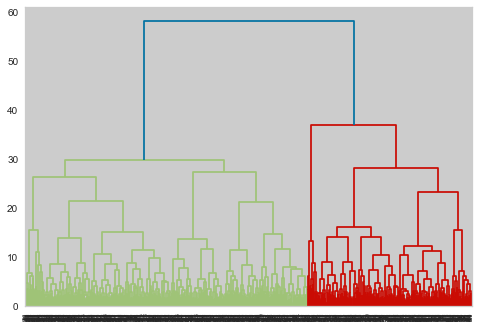

In [105]:
# Identifying Clusters with Agglomerative Clustering

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Create a Dendrogram
dendrogram = sch.dendrogram(sch.linkage(Scaled_Data, method='ward'))


In [121]:
hierarchical_clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

In [132]:
y_hc = hierarchical_clustering.fit_predict(Scaled_Data)

In [123]:
y_hc

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,

<AxesSubplot:>

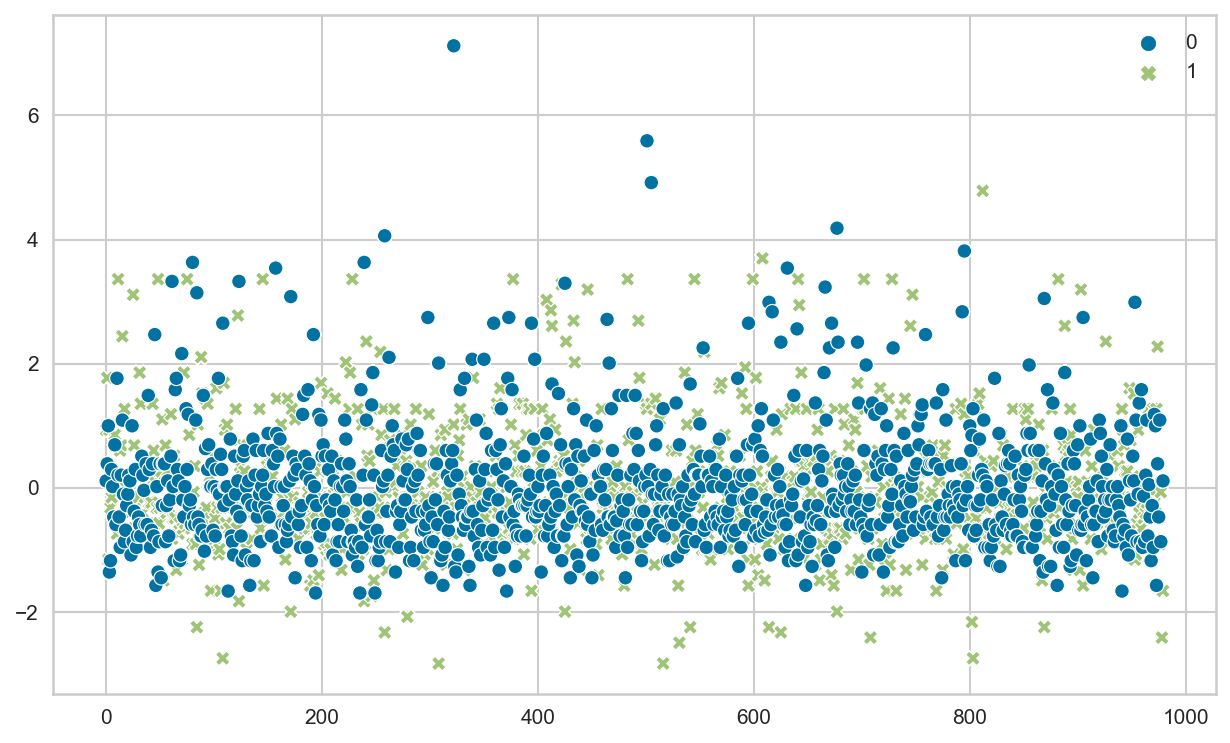

In [137]:
plt.figure(figsize=(10,6), dpi=150)
sns.scatterplot(data = Scaled_Data[y_hc])

In [ ]:
# Identifying Clusters using DBSCAN

In [217]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.8, min_samples=5).fit(Scaled_Data)

In [218]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
db_labels = db.labels_

In [219]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db_labels)) - (1 if -1 in labels else 0)
n_noise_ = list(db_labels).count(-1)

In [213]:
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 951


### Question 3: Evaluate quality of the groupings that you have reported as a solution of Q1 (c) and Q2. Based on the evaluation outcomes, report the best solution and explain the results. (3+2+5 Marks)

In [62]:
# Calculate Silhouette Score for Kmeans

km_score = silhouette_score(Scaled_Data, kmeans.labels_, metric='euclidean')

print(f'Silhouette score: %.3f' % score)

Silhouette score: 0.138


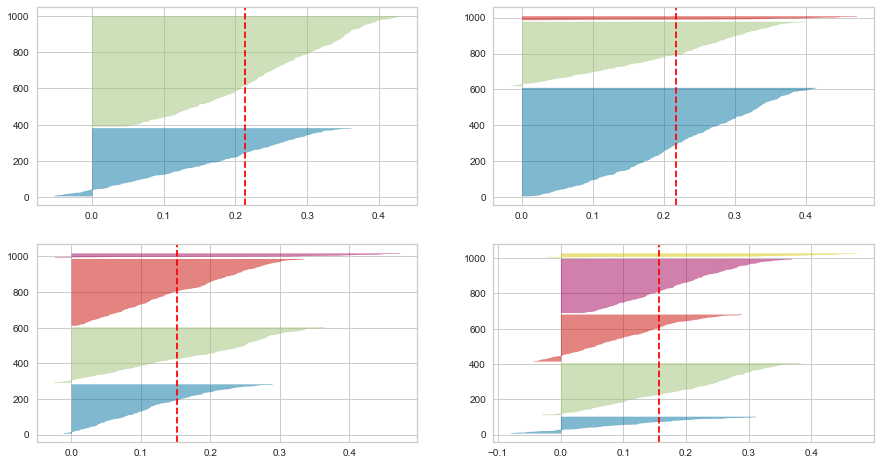

In [63]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(Scaled_Data)

In [221]:
score = silhouette_score(Scaled_Data, y_hc, metric='euclidean')

print(f'Silhouette score: %.3f' % score)

Silhouette score: 0.182


In [220]:
score = silhouette_score(Scaled_Data, db_labels, metric='euclidean')

print(f'Silhouette score: %.3f' % score)

Silhouette score: -0.299


### Question 4: Quantify and print the relationship among independent variables of this dataset (tripadvisor_review.csv). Calculate two collective variables that represent the same dataset. Create a two-dimensional plot to displaythe relationship between these new variables and explain the plot. (1+2+2 Marks)

In [291]:
corr = Scaled_Data.corr(method='pearson', min_periods=1)
print(corr)

          0         1         2         3         4         5         6  \
0  1.000000 -0.187692  0.008613  0.073456 -0.100483  0.094142 -0.012474   
1 -0.187692  1.000000  0.043586  0.131624  0.119631  0.148404  0.110052   
2  0.008613  0.043586  1.000000  0.061128  0.281668  0.356435  0.750651   
3  0.073456  0.131624  0.061128  1.000000  0.101878  0.215866  0.228348   
4 -0.100483  0.119631  0.281668  0.101878  1.000000  0.581306  0.232318   
5  0.094142  0.148404  0.356435  0.215866  0.581306  1.000000  0.430743   
6 -0.012474  0.110052  0.750651  0.228348  0.232318  0.430743  1.000000   
7  0.020029 -0.158642 -0.172953 -0.103583 -0.020957  0.000071 -0.072492   
8 -0.047313  0.073342 -0.085435  0.026670  0.041693  0.096410  0.084965   
9  0.050700 -0.065762 -0.440543 -0.352909 -0.247470 -0.438104 -0.710731   

          7         8         9  
0  0.020029 -0.047313  0.050700  
1 -0.158642  0.073342 -0.065762  
2 -0.172953 -0.085435 -0.440543  
3 -0.103583  0.026670 -0.352909  
4 -0

In [287]:
cov = np.cov(Scaled_Data, bias=True)
print(cov)

[[ 0.6517884   1.06492659  0.05334212 ... -0.31360551 -0.28792307
   0.07671625]
 [ 1.06492659  2.45664991 -0.0494775  ... -0.48581624 -0.73417795
   0.26001225]
 [ 0.05334212 -0.0494775   0.4582132  ... -0.30168765  0.44383987
   0.08292724]
 ...
 [-0.31360551 -0.48581624 -0.30168765 ...  0.39792163 -0.25472137
  -0.00558171]
 [-0.28792307 -0.73417795  0.44383987 ... -0.25472137  1.16688493
   0.10952089]
 [ 0.07671625  0.26001225  0.08292724 ... -0.00558171  0.10952089
   0.63879598]]


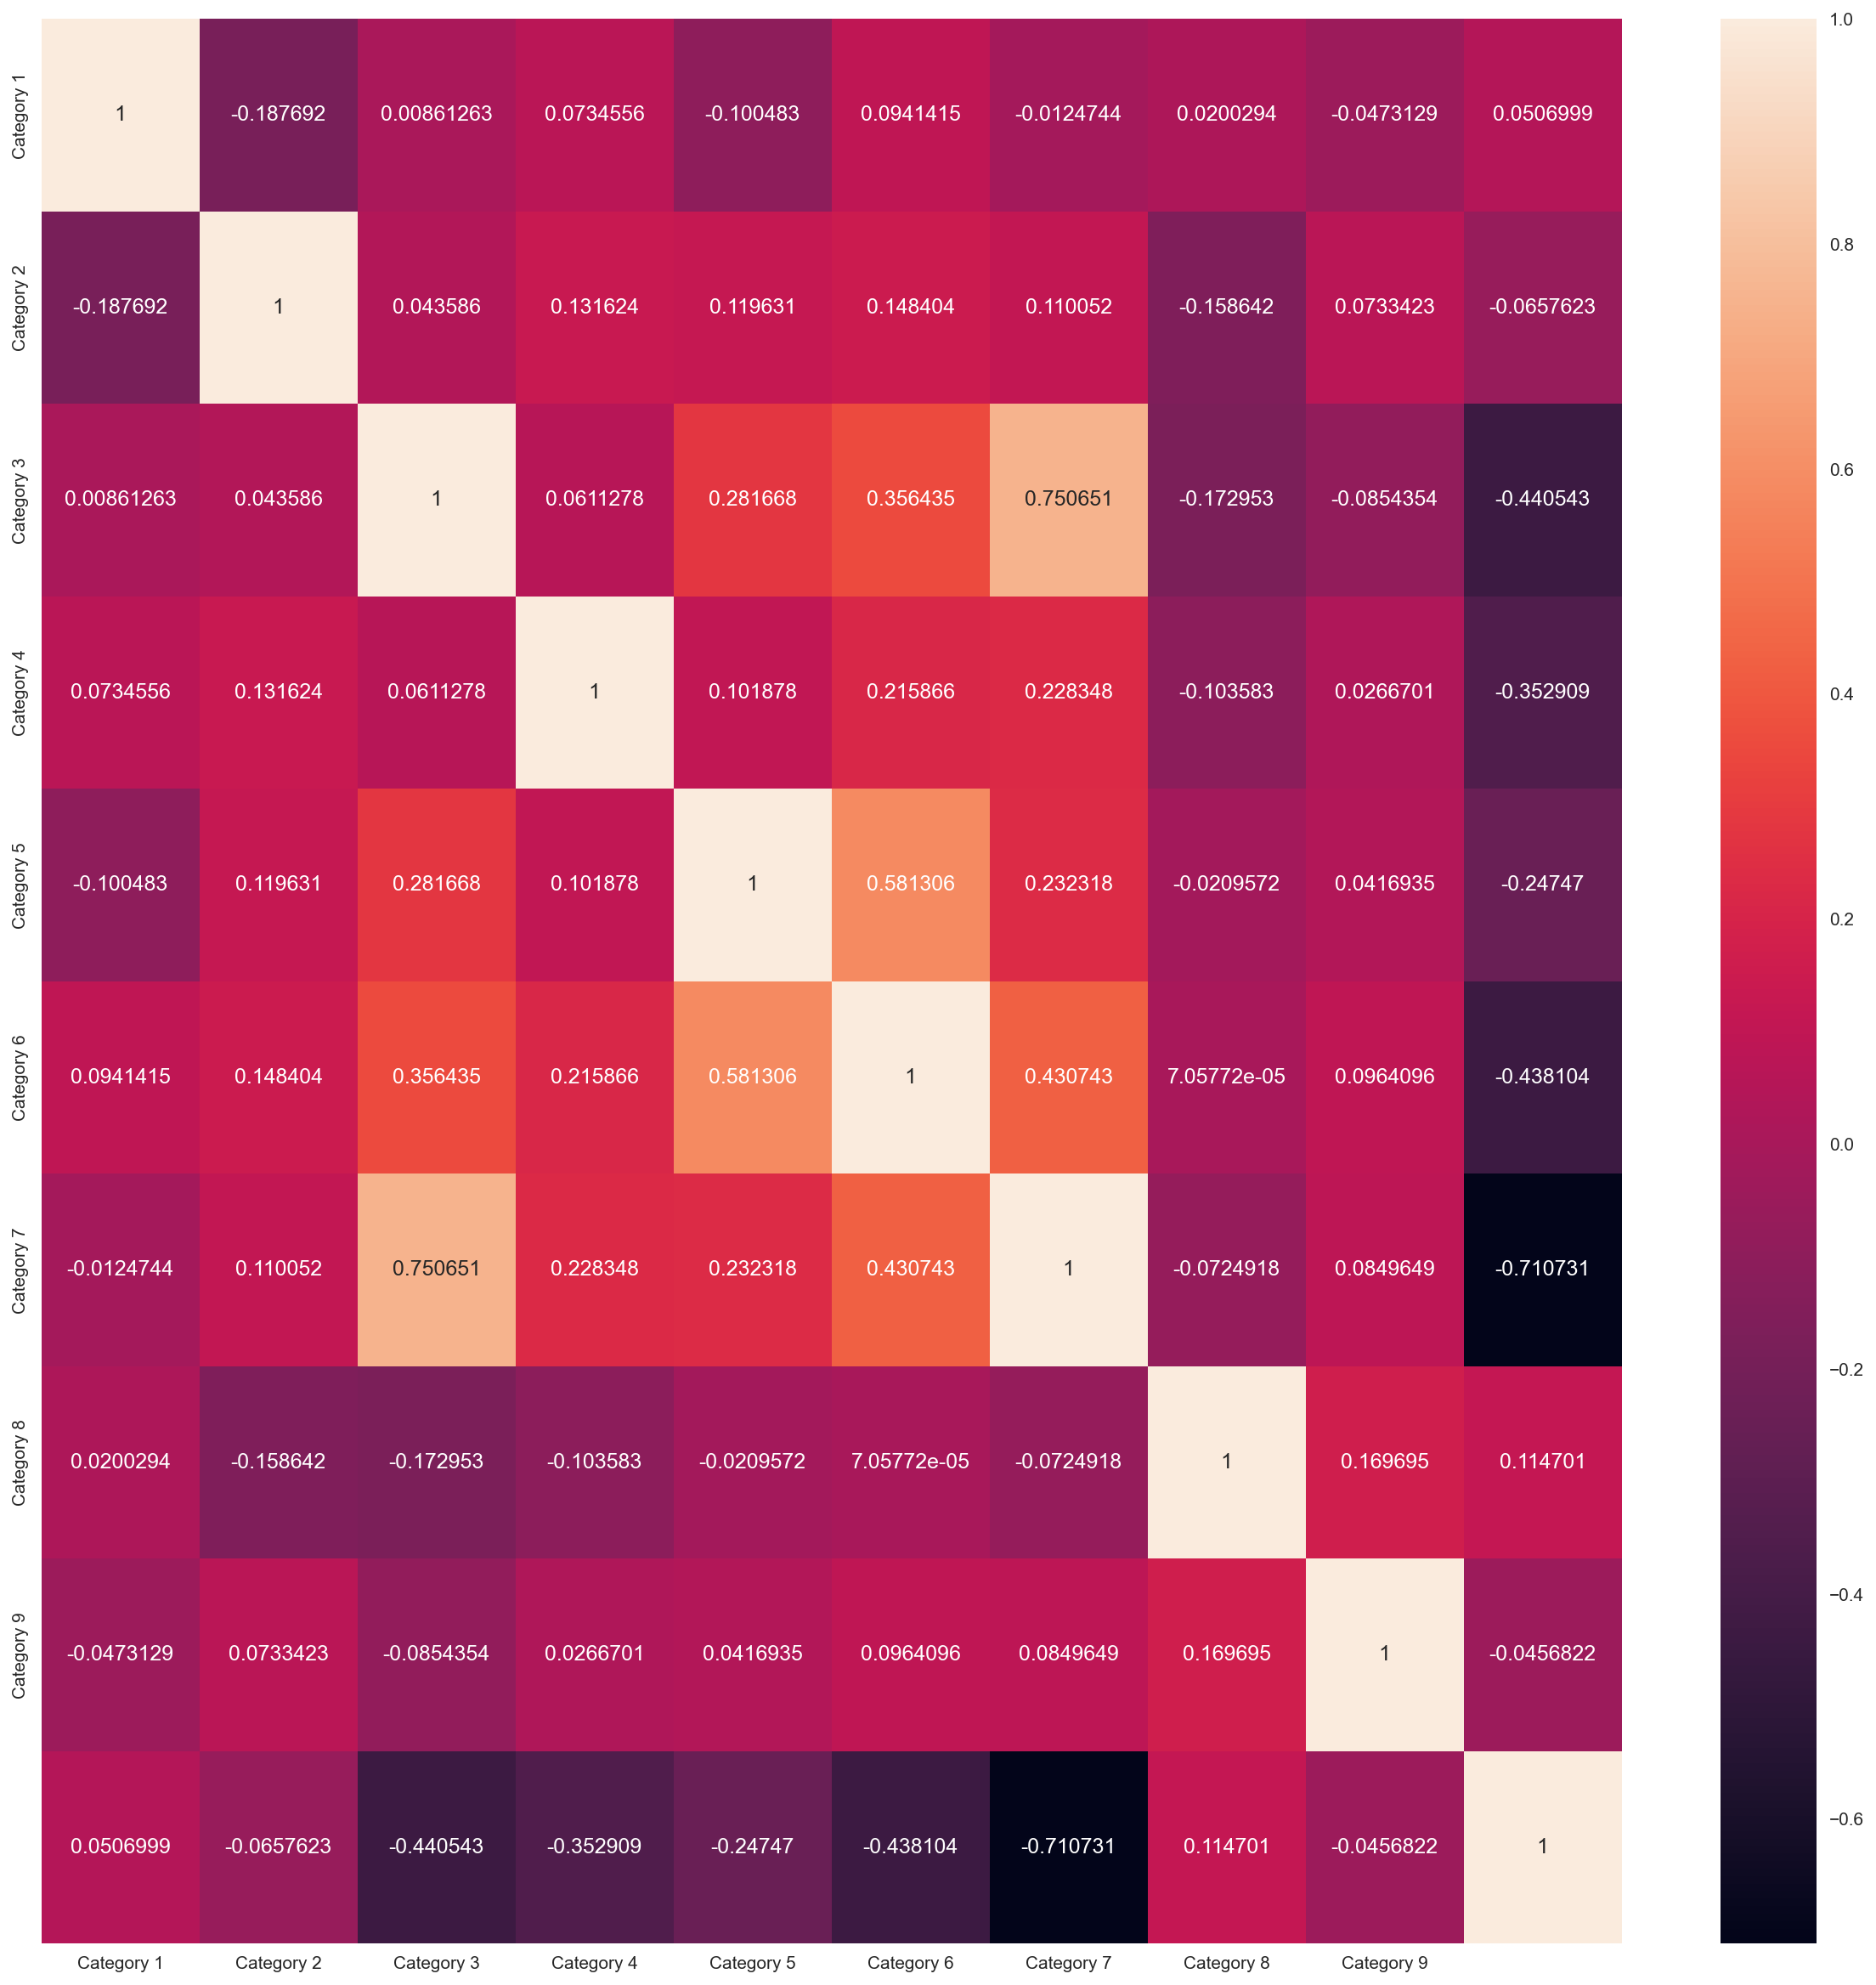

In [288]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5', 'Category 6','Category 7', 'Category 8', 'Category 9']

plt.figure(figsize=(20,20), dpi=150)
sns.heatmap(corr, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.show()

In [296]:
S,U = np.linalg.eig(cov)

print('Eigen values: {}'.format(S))
print('Eigen vectors:')
print(U)

Eigen values: [ 2.46377124e+02+0.00000000e+00j  1.21833792e+02+0.00000000e+00j
  1.10599867e+02+0.00000000e+00j  1.01617316e+02+0.00000000e+00j
  9.36522692e+01+0.00000000e+00j  7.47241787e+01+0.00000000e+00j
  5.85625800e+01+0.00000000e+00j  3.24314804e+01+0.00000000e+00j
  1.50573966e+01+0.00000000e+00j -5.79922094e-14+2.61963891e-14j
 -5.79922094e-14-2.61963891e-14j  3.74725339e-14+3.43012755e-14j
  3.74725339e-14-3.43012755e-14j -5.77309163e-15+3.32293887e-14j
 -5.77309163e-15-3.32293887e-14j  2.51749605e-14+3.90485917e-15j
  2.51749605e-14-3.90485917e-15j  1.23485968e-14+2.09350222e-14j
  1.23485968e-14-2.09350222e-14j  1.70949388e-15+2.30405722e-14j
  1.70949388e-15-2.30405722e-14j -9.47236785e-15+2.08715609e-14j
 -9.47236785e-15-2.08715609e-14j -1.54133892e-14+1.62134878e-14j
 -1.54133892e-14-1.62134878e-14j -2.37167442e-14+0.00000000e+00j
 -2.10388622e-14+8.26834908e-15j -2.10388622e-14-8.26834908e-15j
  1.86935446e-14+5.36895226e-15j  1.86935446e-14-5.36895226e-15j
  6.2824030

In [253]:
from sklearn.decomposition import PCA

In [262]:
pca_model = PCA(n_components=2)
results = pca_model.fit_transform(Scaled_Data)
print(pca_model.explained_variance_ratio_)

[0.29775044 0.1262794 ]


Text(0.5, 1.0, 'PCA Results')

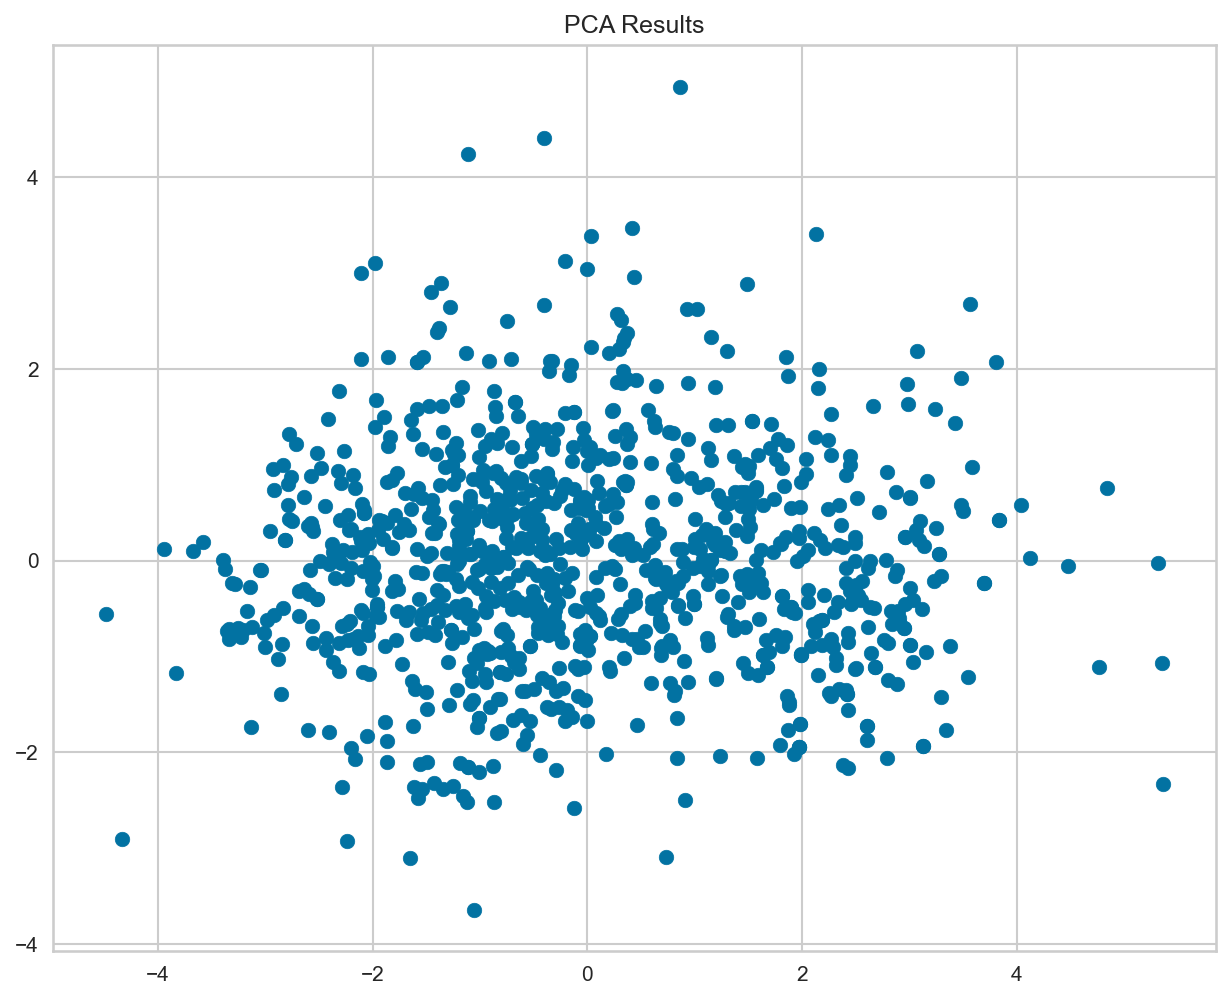

In [295]:
plt.figure(figsize=(10,8), dpi=150)
plt.scatter(results[:,0], results[:,1])
plt.title("PCA Results")

### Question 5 Is there any loss of information due to the transformation performed in Q4? Explain your answer with evidence. (3 marks)

In [265]:
#The amount of variance that each PC explains
var= pca_model.explained_variance_ratio_
print(var)

[0.29775044 0.1262794 ]


[29.78 42.41]


Text(0, 0.5, 'Variance captured')

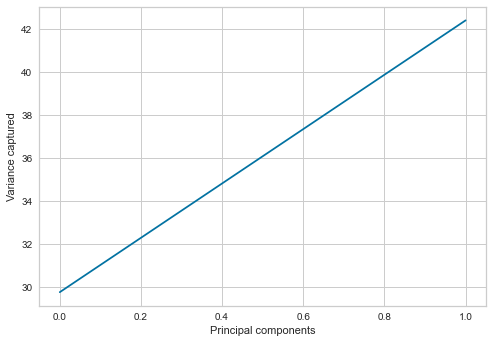

In [266]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca_model.explained_variance_ratio_, decimals=4)*100)
print(var1)
plt.plot(var1)
plt.xlabel("Principal components")
plt.ylabel("Variance captured")

Question 5: Is there any loss of information due to the transformation performed in Q4? Explain your answer with
evidence.

In [268]:
# Reconstruct our data
Xrec = pca_model.inverse_transform(results)
print(Xrec.shape)

(980, 10)


In [272]:
# Measure the reconstruction error
rec_error = np.linalg.norm(Scaled_Data-Xrec, 'fro')/np.linalg.norm(Scaled_Data, 'fro')
print(rec_error)

0.7589269810329786


In [273]:
nSamples, nDims = Scaled_Data.shape

# vary principal components from 1 to 10
n_comp = range(1,nDims+1)
print(n_comp)

range(1, 11)


k=1, rec_error=0.8380033169912247
k=2, rec_error=0.7589269810329786
k=3, rec_error=0.6728002922631
k=4, rec_error=0.5883988382790118
k=5, rec_error=0.4941975590074375
k=6, rec_error=0.40426855359889863
k=7, rec_error=0.3049386774216927
k=8, rec_error=0.21676883846220182
k=9, rec_error=0.11874472135456145
k=10, rec_error=1.3033512849564623e-15


Text(0, 0.5, 'Reconstruction Error')

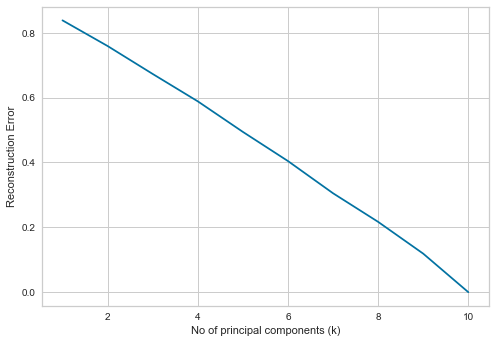

In [275]:
# Initialize vector of rec_error
rec_error = np.zeros(len(n_comp)+1)

for k in n_comp:
    pca = PCA(n_components=k)
    results = pca.fit_transform(Scaled_Data)
    Xrec = pca.inverse_transform(results)
    rec_error[k] = np.linalg.norm(Scaled_Data-Xrec, 'fro')/np.linalg.norm(Scaled_Data, 'fro')
    print("k={}, rec_error={}".format(k, rec_error[k]))

rec_error = rec_error[1:] #we started recording from index 1, so drop index 0


#Visualize the change in error
plt.plot(n_comp,rec_error)
plt.xlabel('No of principal components (k)')
plt.ylabel('Reconstruction Error')

### Question 6 Principal component analysis applied on a given dataset, and the percentage of variance for the first N components is X%. How is this percentage of variance computed?

SEE PDF